# SMS Classifier 
Aim: Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [1]:
#Import Statements
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [2]:
#Loading the dataset
df=pd.read_csv("C:/Users/admin/Downloads/spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Split the data
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

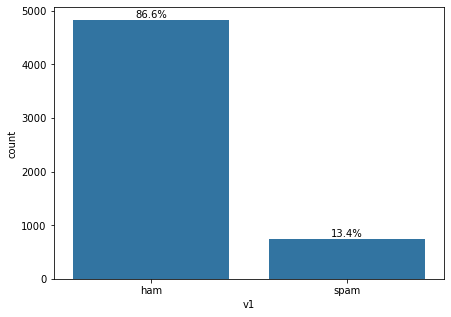

In [4]:
#Visualization
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)
   
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()

In [5]:
#Splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(), 
    y.values.ravel(), 
    test_size=0.20, 
    random_state=42)

In [6]:
#Extracting features
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [7]:
#Model Training
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=Fa

In [8]:
clf_tfidf_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', clf_method)
 ])

clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_

In [9]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)

print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(f"Train Accuracy using TF-IDF Vectorizer: {accuracy_score(y_train, y_train_pred_tfidf_vect):.3f}")

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:187: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy using Count Vectorizer: 0.973
Train Accuracy using TF-IDF Vectorizer: 0.920


In [10]:
#classification report using Count Vectoizer
print(classification_report(y_train, y_train_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3860
        spam       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [11]:
#classification report using TF-IDF Vectorizer
print(classification_report(y_train, y_train_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      3860
        spam       1.00      0.41      0.58       597

    accuracy                           0.92      4457
   macro avg       0.96      0.70      0.77      4457
weighted avg       0.93      0.92      0.91      4457



In [12]:
#Model Evalation
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

Test Accuracy using Count Vectorizer: 0.968
Test Accuracy using TF-IDF Vectorizer: 0.916


In [13]:
print(classification_report(y_test, y_test_pred_cvect))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [14]:
print(classification_report(y_test, y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



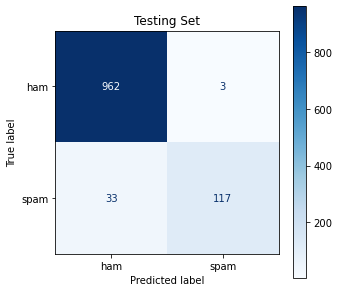

In [15]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_cvect)
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(y_test))
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show()